Breakdown by industry

Breakdown by country

Breakdown by Mutual Fund / ETF / individual stock

Breakdown by small / mid / large cap


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,ticker,name,weight,country,sector
0,LPLA,LPL FINANCIAL HOLDINGS INC,0.004857,US,Financials
1,ZI,ZOOMINFO TECHNOLOGIES INC,0.004140,US,Telecommunication Services
2,EQT,EQT CORP,0.003699,US,Energy
3,OVV,OVINTIV INC,0.003314,US,Energy
4,FHN,FIRST HORIZON CORP,0.003275,US,Financials


In [ ]:
df.shape

(1795, 5)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ticker     0
name       0
weight     0
country    0
sector     4
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1791, 5)

In [ ]:
label = df['country'].value_counts().keys()

In [ ]:
value = df['country'].value_counts().values

In [ ]:
def draw_bar_graph(data, labels, title):
    plt.bar(range(len(data)), data, align='center')
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.show()

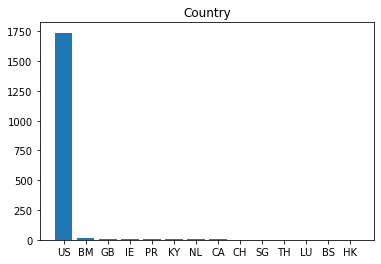

In [ ]:
draw_bar_graph(value, label, "Country")

In [ ]:
df['nation'] = df['country'].apply(lambda x: 'Domestic' if x == 'US' else 'International')

In [ ]:
df.head()

,ticker,name,weight,country,sector,nation
0,LPLA,LPL FINANCIAL HOLDINGS INC,0.004857,US,Financials,Domestic
1,ZI,ZOOMINFO TECHNOLOGIES INC,0.004140,US,Telecommunication Services,Domestic
2,EQT,EQT CORP,0.003699,US,Energy,Domestic
3,OVV,OVINTIV INC,0.003314,US,Energy,Domestic
4,FHN,FIRST HORIZON CORP,0.003275,US,Financials,Domestic


In [ ]:
df['nation'].value_counts()

Domestic         1739
International      52
Name: nation, dtype: int64

[Text(0.5, 1.0, 'Domestic vs International')]

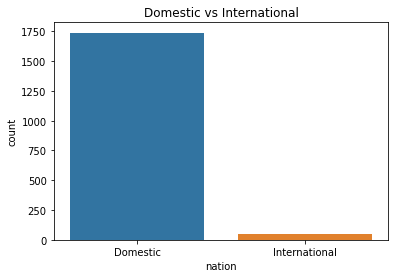

In [ ]:
sns.countplot(data = df, x = 'nation').set(title = 'Domestic vs International')

In [ ]:
category = df['sector'].value_counts().keys()
values = df['sector'].value_counts().values

In [ ]:
def pie_chart(categories, values):
    
    labels = categories
    sizes = values
    
    plt.pie(sizes, labels=labels)
 
    plt.axis('equal')
    plt.show()

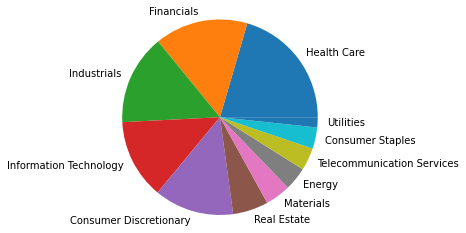

In [ ]:
pie_chart(category, values)

In [ ]:
import os
with open("region.txt", "r") as f:
  data = f.readlines()

In [ ]:
Map = {}
for x in data:
  x = x.split("-")  
  Map[x[0].strip()] = x[1].strip()

In [ ]:
Map

{'US': 'NA',
 'BM': 'NA',
 'GB': 'EMEA',
 'IE': 'EMEA',
 'China': 'APAC',
 'NL': 'EMEA',
 'PR': 'LATAM',
 'Taiwan': 'APAC',
 'CA': 'NA',
 'KY': 'LATAM',
 'India': 'APAC',
 'South Korea': 'APAC',
 'CH': 'EMEA',
 'Hong Kong': 'APAC',
 'IL': 'EMEA',
 'SG': 'APAC',
 'JE': 'EMEA',
 'HK': 'APAC',
 'BS': 'LATAM',
 'Thailand': 'APAC',
 'LU': 'EMEA',
 'TH': 'APAC',
 'Indonesia': 'APAC',
 'Singapore': 'APAC',
 'SE': 'EMEA',
 'Philippines': 'APAC',
 'Vietnam': 'APAC'}

In [ ]:
df['region'] = df['country'].apply(lambda x: Map[x])

In [ ]:
df.head()

,ticker,name,weight,country,sector,nation,region
0,LPLA,LPL FINANCIAL HOLDINGS INC,0.004857,US,Financials,Domestic,NA
1,ZI,ZOOMINFO TECHNOLOGIES INC,0.004140,US,Telecommunication Services,Domestic,NA
2,EQT,EQT CORP,0.003699,US,Energy,Domestic,NA
3,OVV,OVINTIV INC,0.003314,US,Energy,Domestic,NA
4,FHN,FIRST HORIZON CORP,0.003275,US,Financials,Domestic,NA


In [ ]:
df['region'].value_counts()

NA       1757
EMEA       21
LATAM       9
APAC        4
Name: region, dtype: int64

In [ ]:
label = df['region'].value_counts().keys()
value = df['region'].value_counts().values

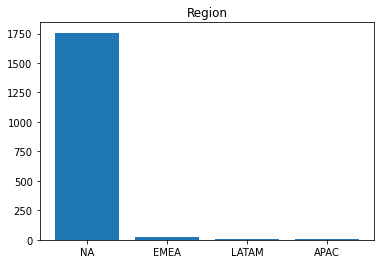

In [ ]:
draw_bar_graph(value, label, "Region")

In [ ]:
a = df.groupby('nation')['weight'].sum().reset_index()

In [ ]:
a.set_index('nation', inplace = True)

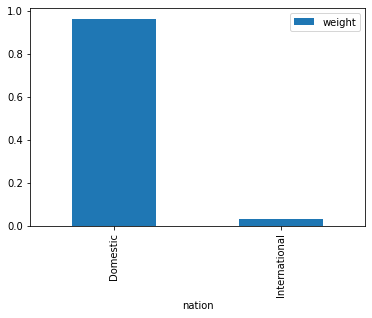

In [ ]:
a.plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


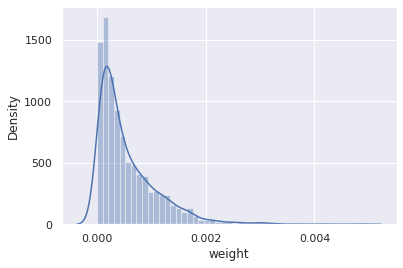

In [ ]:
ax = sns.distplot(df['weight'])
sns.set(font_scale = 1.7)